In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
data=pd.read_csv('C:/Users/priya/Downloads/titanic.csv')

## Univariate Analysis

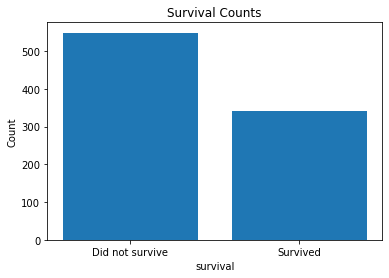

In [104]:
# Bar plot of survival counts
survival_counts = data['survived'].value_counts()
plt.bar(survival_counts.index, survival_counts.values)
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.xlabel('survival')
plt.ylabel('Count')
plt.title('Survival Counts')
plt.show()

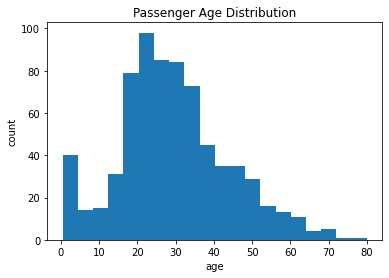

In [107]:
# Histogram of passenger ages
plt.hist(data['age'].dropna(), bins=20)
plt.xlabel('age')
plt.ylabel('count')
plt.title('Passenger Age Distribution')
plt.show()

## Bi-Variate Analysis

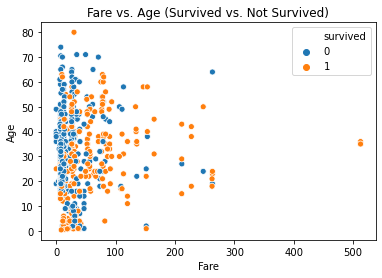

In [110]:
# Scatter plot of fare vs. age
sns.scatterplot(data=data, x='fare', y='age', hue='survived')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare vs. Age (Survived vs. Not Survived)')
plt.show()


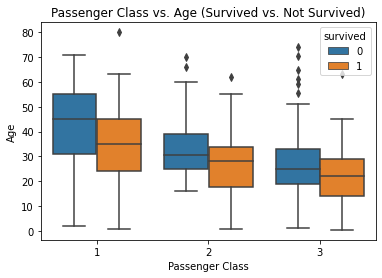

In [111]:
# Box plot of passenger class vs. age
sns.boxplot(data=data, x='pclass', y='age', hue='survived')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Passenger Class vs. Age (Survived vs. Not Survived)')
plt.show()

## Multi-Variate Analysis

C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


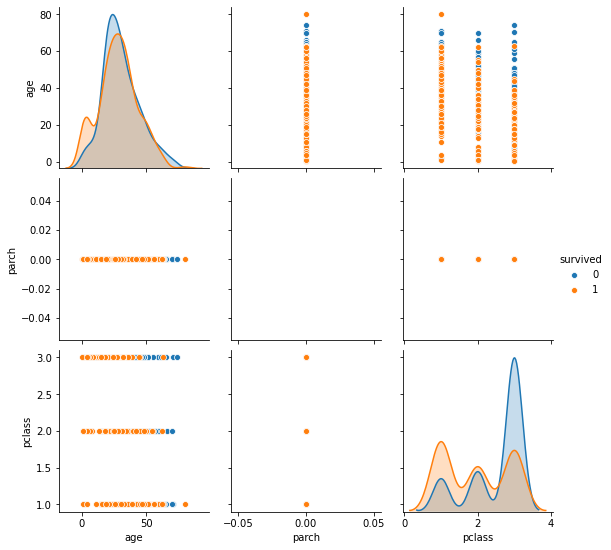

In [115]:
sns.pairplot(data=data, vars=['age', 'parch', 'pclass'], hue='survived')
plt.show()


## Descriptive Statistics

In [20]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handle the Missing values.

In [116]:
median_age = data['age'].median()
data['age'].fillna(median_age, inplace=True)

In [117]:
median_age

28.0

##  Find the outliers and replace the outliers

In [34]:
#Finfing the outliers in the parch column using 
Q1 = data["parch"].quantile(0.25)
Q3 = data["parch"].quantile(0.75)

In [35]:
IQR = Q3 - Q1
IQR

0.0

In [36]:
lower_bound = Q1 - (1.5 * IQR)
lower_bound

0.0

In [37]:
upper_bound = Q3 + (1.5 * IQR)
upper_bound

0.0

In [38]:
outliers = data[(data["fare"] < lower_bound) | (data["fare"] > upper_bound)]


In [33]:
outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False


In [39]:
#Replace outliers
median_parch = data["parch"].median()
data["parch"] = np.where((data["parch"] < lower_bound) | (data["parch"] > upper_bound), median_parch, data["parch"])

In [40]:
median_parch

0.0

In [41]:
data["parch"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    0.0
890    0.0
Name: parch, Length: 891, dtype: float64

## Check for Categorical columns and perform encoding

In [118]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)



Index(['embarked', 'deck', 'embark_town', 'alive'], dtype='object')


In [129]:
# Perform one-hot encoding on the 'sex' column
data = pd.get_dummies(data, columns=['deck'], drop_first=True)

In [130]:
data

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,...,alone,sex_1,embarked_Q,embarked_S,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,22.0,1,0.0,7.2500,2,1,True,Southampton,...,False,1,0,1,0,0,0,0,0,0
1,1,1,38.0,1,0.0,71.2833,0,2,False,Cherbourg,...,False,0,0,0,0,1,0,0,0,0
2,1,3,26.0,0,0.0,7.9250,2,2,False,Southampton,...,True,0,0,1,0,0,0,0,0,0
3,1,1,35.0,1,0.0,53.1000,0,2,False,Southampton,...,False,0,0,1,0,1,0,0,0,0
4,0,3,35.0,0,0.0,8.0500,2,1,True,Southampton,...,True,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0.0,13.0000,1,1,True,Southampton,...,True,1,0,1,0,0,0,0,0,0
887,1,1,19.0,0,0.0,30.0000,0,2,False,Southampton,...,True,0,0,1,1,0,0,0,0,0
888,0,3,28.0,1,0.0,23.4500,2,2,False,Southampton,...,False,0,0,1,0,0,0,0,0,0
889,1,1,26.0,0,0.0,30.0000,0,1,True,Cherbourg,...,True,1,0,0,0,1,0,0,0,0


## Split the data into dependent and independent variables

In [133]:
X = data.drop('survived', axis=1)
Y = data['survived']

In [134]:
X

,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,sex_1,embarked_Q,embarked_S,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,3,22.0,1,0.0,7.2500,2,1,True,Southampton,no,False,1,0,1,0,0,0,0,0,0
1,1,38.0,1,0.0,71.2833,0,2,False,Cherbourg,yes,False,0,0,0,0,1,0,0,0,0
2,3,26.0,0,0.0,7.9250,2,2,False,Southampton,yes,True,0,0,1,0,0,0,0,0,0
3,1,35.0,1,0.0,53.1000,0,2,False,Southampton,yes,False,0,0,1,0,1,0,0,0,0
4,3,35.0,0,0.0,8.0500,2,1,True,Southampton,no,True,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0.0,13.0000,1,1,True,Southampton,no,True,1,0,1,0,0,0,0,0,0
887,1,19.0,0,0.0,30.0000,0,2,False,Southampton,yes,True,0,0,1,1,0,0,0,0,0
888,3,28.0,1,0.0,23.4500,2,2,False,Southampton,no,False,0,0,1,0,0,0,0,0,0
889,1,26.0,0,0.0,30.0000,0,1,True,Cherbourg,yes,True,1,0,0,0,1,0,0,0,0


In [135]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

## Scale the independent variables

In [152]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [153]:
columns_to_scale = ['age', 'fare']
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
X[columns_to_scale]

,age,fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337
...,...,...
886,-0.181487,-0.386671
887,-0.796286,-0.044381
888,-0.104637,-0.176263
889,-0.258337,-0.044381


## Split the data into training and testing

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [157]:
X_train, X_test, Y_train, Y_test 

(     pclass       age  sibsp  parch      fare  class  who  adult_male  \
 331       1  1.240235      0    0.0 -0.074583      0    1        True   
 733       2 -0.488887      0    0.0 -0.386671      1    1        True   
 382       3  0.202762      0    0.0 -0.488854      2    1        True   
 704       3 -0.258337      1    0.0 -0.490280      2    1        True   
 813       3 -1.795334      4    0.0 -0.018709      2    0       False   
 ..      ...       ...    ...    ...       ...    ...  ...         ...   
 106       3 -0.642586      0    0.0 -0.494391      2    2       False   
 270       1 -0.104637      0    0.0 -0.024246      0    1        True   
 860       3  0.894411      2    0.0 -0.364355      2    1        True   
 435       1 -1.180535      1    0.0  1.767741      0    0       False   
 102       1 -0.642586      0    0.0  0.907738      0    1        True   
 
      embark_town alive  alone  sex_1  embarked_Q  embarked_S  deck_B  deck_C  \
 331  Southampton    no   Tru